In [1]:
# Import the necessary libraries 
import pandas as pd # Dataframe Management
import matplotlib.pyplot as plt 
import seaborn as sns # Visualization
from sklearn.model_selection import train_test_split 
import pickle # Model Serialization

In [2]:
# Load Data
df = pd.read_csv('./data/spam_or_ham.csv', delimiter=',', encoding='latin-1')

In [3]:
# View Dataset
df.head(n=10)

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


Text(0.5,1,'Number of ham and spam messages')

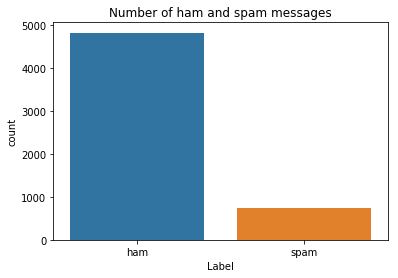

In [4]:
# Check Distribution
sns.countplot(df.Label)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [5]:
# Split Data Set into Train and Test
# Train 80%
# Test  20%
# random_state setup means same values every time split is perfomed 
X_train, X_test, Y_train, Y_test = train_test_split(df.Text, df.Label, test_size=0.2, random_state=123)

In [6]:
# https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC, SVC
import time

# Python Function
def models(list_sentences_train, list_sentences_test, train_labels, test_labels):
    t0 = time.time() # start time
    
    # Pipeline 
    model = Pipeline([('vect', CountVectorizer(ngram_range=(1,3))), 
                      ('tfidf', TfidfTransformer(use_idf=False)), 
                      ('clf', LinearSVC())])
    
    # Train Model
    model.fit(list_sentences_train, train_labels) 
    
    duration = time.time() - t0 # end time
    print("Training done in %.3fs " % duration)

    # Model Accuracy
    print('Model final score: %.3f' % model.score(list_sentences_test, test_labels))
    return model

# Train, Evaluate and Save Model
model_std_NLP = models(X_train, X_test, Y_train, Y_test)

Training done in 0.340s 
Model final score: 0.985


In [7]:
test_text_spam = ['Urgent! call 09066350750 from your landline. Your complimentary 4* Ibiza Holiday or 10,000 cash await collection SAE T&Cs PO BOX 434 SK3 8WP 150 ppm 18+ ']
test_text_ham = ['Good. No swimsuit allowed :)']
print(model_std_NLP.predict(test_text_spam)) 
print(model_std_NLP.predict(test_text_ham)) 

# Ham - 0
# Good. No swimsuit allowed :)
# Wish i were with you now!
# Im sorry bout last nite it wasnÃ¥Ãt ur fault it was me, spouse it was pmt or sumthin! U 4give me? I think u shldxxxx
# Spam - 1

# Urgent! call 09066350750 from your landline. Your complimentary 4* Ibiza Holiday or 10,000 cash await collection SAE T&Cs PO BOX 434 SK3 8WP 150 ppm 18+ 
# +123 Congratulations - in this week's competition draw u have won the Ã¥Â£1450 prize to claim just call 09050002311 b4280703. T&Cs/stop SMS 08718727868. Over 18 only 150ppm
# Double mins and txts 4 6months FREE Bluetooth on Orange. Available on Sony, Nokia Motorola phones. Call MobileUpd8 on 08000839402 or call2optout/N9DX

['spam']
['ham']


In [8]:
# Save to file in the current working directory
pkl_filename = "pickle_model.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(model_std_NLP, file)

# Load from file
with open(pkl_filename, 'rb') as file:  
    pickle_model = pickle.load(file)